Luan Navarro Silva - 2020344

1. Perform an initial analysis of the data (EDA) using python in your Jupyter notebook. Discuss your
findings and what relevance they might have on your planned classification algorithms.

Dataset head:
                           0      1      2      3      4
Source Port           57222  56258   6881  50553  50002
Destination Port         53   3389  50321   3389    443
NAT Source Port       54587  56258  43265  50553  45848
NAT Destination Port     53   3389  50321   3389    443
Bytes                   177   4768    238   3327  25358
Bytes Sent               94   1600    118   1438   6778
Bytes Received           83   3168    120   1889  18580
Packets                   2     19      2     15     31
Elapsed Time (sec)       30     17   1199     17     16
pkts_sent                 1     10      1      8     13
pkts_received             1      9      1      7     18
Action                allow  allow  allow  allow  allow

Dataset info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65532 entries, 0 to 65531
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Source Port           65532 

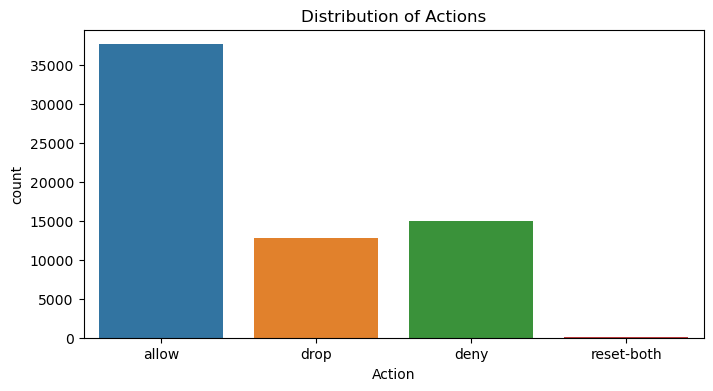


Missing values in each column:
Source Port             0
Destination Port        0
NAT Source Port         0
NAT Destination Port    0
Bytes                   0
Bytes Sent              0
Bytes Received          0
Packets                 0
Elapsed Time (sec)      0
pkts_sent               0
pkts_received           0
Action                  0
dtype: int64


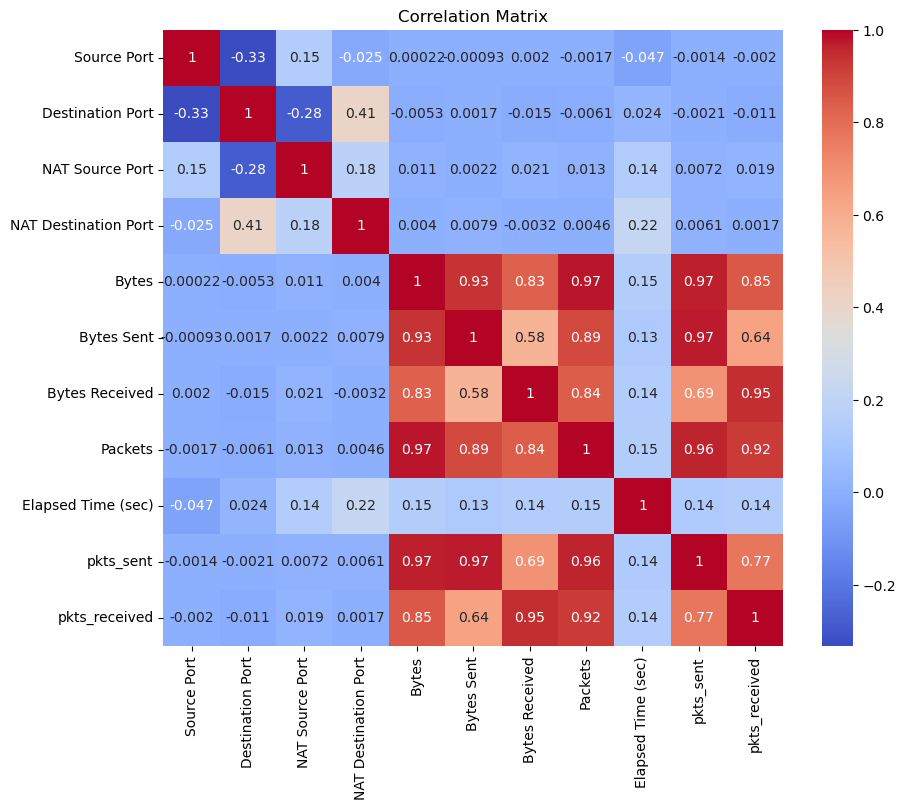

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Loads the dataset.
df = pd.read_csv('log2.csv')

# Overview of the 5 first lines of the dataset.
print("Dataset head:\n", df.head().T) # Transposed for better readability.

# Overview of the number of entries and the characteristics of each column.
print("\nDataset info:")
df.info()

# Summary of the statistics for numerical data.
print("\nSummary statistics for numerical data:")
print(df.describe())

# Checks the distribution of each 'Action' feature.
action_counts = df['Action'].value_counts(normalize=True) * 100 # Multiplied by 100 to generate percentage.
print("\nDistribution of 'Action' feature:")
print(action_counts)

# Visualization of the distribution of the 'Action' feature.
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='Action')
plt.title("Distribution of Actions")
plt.show()

# Checking for missing values.
missing_values = df.isnull().sum()
print("\nMissing values in each column:")
print(missing_values)

# Correlation analysis adjusted to exclude non-numeric columns.
numeric_df = df.select_dtypes(include=[np.number])  # This selects only the numeric columns.
correlation_matrix = numeric_df.corr()  # Generates the matrix over only the numeric features.

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Matrix")
plt.show()

    Based on the overview and initial exploration of the dataset through an exploratory data analysis, I have found that the dataset is complete, with no missing values across all 65.532 entries. This is suitable for model training as there will be no imputation strategies to remediate missing values. The features on the dataset have a wide range of values, especifically in port numbers, ranging from 0 to 65535, which is expected given the nature of port numbers. The relevance of specific ports to the 'Action' taken regarding could be an interesting aspect for the model to learn.
    Another important feature is the traffic statistics (Bytes, bytes sent, bytes received and packets). These features show large variability suggesting minimal and very heavy traffic which could influence the firewall's aaction.
    The action distribution shows a distribution of where the 'Action' 'allow' constitutes over 57% of the cases, the model will need to be prepared to understand that while allow happens more than half ot the time, there are factors influencing such behavior. A well developed model will not allow 57% of the time but identify the best action to take according to each individual scenario.
    The correlation matrix also allows us to understand certain correlations between each features. Features regarding data such as bytes, bytes sent, packets... all highly correlate with each other. On the other hand, source port and destination port have a negative correlation with each other.
    Taking all this information into account, certain implications will be caused for the classificaiton algorithms. Due to the variability in range in features like bytes, it may be necessary to use a feature scaling. This high variability may also be due to outliers, these will need to be detected and handled appropriately. 
    A suitable model will need to be selected taking all the information into account, a model that can handle imbalanced data and make probabilistic predictions should be a good suit for the dataset. Decision trees and logistic regression are possibly the algorithm models that are going to be used throughout this assignment.